# Исследование результатов игр от команды "Квиз, плиз!" 

**Актуальность работы:** Для играющих в различные игры иногда интересно посмотреть статистику, топы по различным категориям. На сайте игры представлена некоторая статистика, но она в основном касается количества сыгранных командой игр и набранных очков. Данная работа несколько больше показывает различные стороны игры и заостряет внимание на отдельных её элементах. И вероятно, для какого-то количества людей эта информация будет интересна.

**Данные:** Информация была получена с сайта ["Квиз, плиз!"](https://spb.quizplease.ru/) и касается игр в городе Санкт-Петербург, начиная с пакета №174 и по пакет №777 для классических игр `[новички] SPB` и `Квиз, плиз! SPB` без стримов и затрагивает период с 2019 по 2024 год. Для более ранних пакетов информация о результатах на сайте отсутствовала. Данные собраны в хронологическом порядке (первые строки самые ранние, последние самые поздние), для каждой игры присутствует сортировка по занятому командой месту. Код для сбора датасета и его очистки также предоставлен в файлах.

В данных 43120 строк и 19 столбцов.

Столбцы:
- place: место команды в конкретной игре;
- team_name: название команды;
- round_1 - round_7: результаты с 1 по 7 раунды;
- total: общее количество баллов за игру;
- game_name: название игры;
- game_number: номер пакета;
- cafe_name: название места проведения;
- cafe_adress: адрес места проведения;
- date: дата проведения;
- url: страница игры на сайте;
- day: день проведения;
- month: месяц проведения;
- year: год проведения;

[Ссылка на очищенный датасет](https://disk.yandex.ru/d/84oKFzcDGQyRig)

[Ссылка на сырой датасет](https://disk.yandex.ru/d/j8v4NnuUYYhV0Q)

**Ход работы:** сначала мы "познакомимся" с данными, опишем некоторые меры центральной тенденции, построим несколько графиков, а в конце проверим гипотезу.



<a id='Оглавление'> </a>
Оглавление:
- <a href='#Знакомство'>1. Знакомство с данными</a>
- <a href='#Исследование'>2. Исследование данных</a>
- <a href='#60'>2.1 Исследование для 60 команд и более</a>
- <a href='#Все'>2.2 Исследование для всех игр</a>
- <a href='#Графики'>3. Графики</a>
- <a href='#Гипотезы'>4. Гипотезы</a>
- <a href='#Вывод'>5. Вывод</a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<a id='Знакомство'> </a>

## 1. Знакомство с данными

In [2]:
# путь к файлу
path = 'quiz_clear_data.csv'

try:
    df = pd.read_csv(path)
    print('Данные загружены')
except:
    print('Неверный путь до файла!')

Данные загружены


In [3]:
df.head()

,place,team_name,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total,game_name,game_number,cafe_name,cafe_adress,date,url,day,month,year
0,1,Дюмасброды,6,4,6,2,6,4,18,46,"Квиз, плиз! SPB",777,Хали-Гали,"Набережная канала Грибоедова, д. 36",2024-02-12,https://quizplease.ru/game-page?id=72419,12,2,2024
1,2,Крем Брюллофф,5,5,5,9,4,4,13,45,"Квиз, плиз! SPB",777,Хали-Гали,"Набережная канала Грибоедова, д. 36",2024-02-12,https://quizplease.ru/game-page?id=72419,12,2,2024
2,3,Немирович-Данченко,5,5,5,8,4,2,13,42,"Квиз, плиз! SPB",777,Хали-Гали,"Набережная канала Грибоедова, д. 36",2024-02-12,https://quizplease.ru/game-page?id=72419,12,2,2024
3,4,Неформальное Объединение Молодёжи,5,5,6,6,5,2,12,41,"Квиз, плиз! SPB",777,Хали-Гали,"Набережная канала Грибоедова, д. 36",2024-02-12,https://quizplease.ru/game-page?id=72419,12,2,2024
4,5,Ума по Лайту,5,3,6,6,3,4,12,39,"Квиз, плиз! SPB",777,Хали-Гали,"Набережная канала Грибоедова, д. 36",2024-02-12,https://quizplease.ru/game-page?id=72419,12,2,2024


In [4]:
df.shape

(43120, 19)

In [5]:
df.describe()

,place,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total,game_number,day,month,year
count,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000
mean,16.932004,4.387662,3.824629,3.709160,5.811851,3.842857,1.837083,7.679615,31.091860,524.447635,15.416953,6.708047,2021.878641
std,11.224919,1.161727,1.569733,1.401791,2.994233,1.701332,1.843871,5.026982,10.744089,178.078300,8.692991,3.558367,1.342882
min,1.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,-12.000000,-10.000000,174.000000,1.000000,1.000000,2019.000000
25%,8.000000,4.000000,3.000000,3.000000,4.000000,3.000000,0.000000,4.000000,23.000000,384.000000,8.000000,3.000000,2021.000000
50%,16.000000,4.000000,4.000000,4.000000,6.000000,4.000000,2.000000,7.000000,31.000000,560.000000,15.000000,7.000000,2022.000000
75%,24.000000,5.000000,5.000000,5.000000,8.000000,5.000000,4.000000,12.000000,39.000000,675.000000,23.000000,10.000000,2023.000000
max,71.000000,6.000000,6.000000,6.000000,12.000000,6.000000,6.000000,18.000000,60.000000,777.000000,31.000000,12.000000,2024.000000


Ничего необычного нет, данные подготовлены, очки в раундах соответствуют возможным.

In [6]:
df['game_name'].unique()

array(['Квиз, плиз! SPB', '[новички] SPB'], dtype=object)

В данных информация о двух типах игр.

In [7]:
df_new = df[df['game_name'] == '[новички] SPB']
df_old = df[df['game_name'] != '[новички] SPB']

In [8]:
print('Количество игр: {}'.format(len(set(
    [i for i in zip(df['game_number'], df['game_name'], df['date'])])))
)
print('Количество игр для новичков: {}'.format(len(set(
    [i for i in zip(df_new['game_number'], df_new['game_name'], df_new['date'])])))
)
print('Количество обычных игр: {}'.format(len(set(
    [i for i in zip(df_old['game_number'], df_old['game_name'], df_old['date'])])))
)
print('Количество уникальных пакетов: {}'.format(df['game_number'].nunique()))
print('Количество уникальных пакетов для новичков: {}'.format(df_new['game_number'].nunique()))
print('Количество уникальных пакетов обычных игр: {}'.format(df_old['game_number'].nunique()))

Количество игр: 1426
Количество игр для новичков: 97
Количество обычных игр: 1329
Количество уникальных пакетов: 601
Количество уникальных пакетов для новичков: 97
Количество уникальных пакетов обычных игр: 600


Игры новичков проходят на тех же пакетах, что и обычные

In [9]:
df.loc[:, 'round_1':'total'].mean()

round_1     4.387662
round_2     3.824629
round_3     3.709160
round_4     5.811851
round_5     3.842857
round_6     1.837083
round_7     7.679615
total      31.091860
dtype: float64

Средние значения по отдельной игре (не пакету).

___

**Данные чистые, выбивающихся значений нет**

<a href='#Оглавление'>Возврат к оглавлению</a>

<a id='Исследование'> </a>

## 2. Исследование данных

Сформируем таблицу, с которой будем работать в данном разделе

In [10]:
# сгруппируем таблицу по пакетам игр, посчитаем количество команд и средние для каждого раунда и суммы баллов
df_grouped = (
    df.
    groupby('game_number').
    agg({
        'team_name': 'count',
        'round_1': 'mean',
        'round_2': 'mean',
        'round_3': 'mean',
        'round_4': 'mean',
        'round_5': 'mean',
        'round_6': 'mean',
        'round_7': 'mean',
        'total': 'mean'
    }
    )
    .rename(columns={'team_name': 'team_count'})
    .round(2)
)

df_grouped.head()

,team_count,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total
game_number,,,,,,,,,
174,66,3.73,3.55,1.86,6.67,5.11,2.64,9.35,32.89
175,63,5.02,2.49,4.37,6.27,3.75,1.08,6.97,29.94
176,72,4.38,3.18,3.53,2.86,4.15,3.50,7.62,29.22
177,73,4.99,4.90,3.67,7.64,5.56,2.99,11.84,41.59
178,78,4.68,5.09,3.21,6.86,2.72,2.04,12.40,36.99


*Сколько команд в среднем играет каждый пакет?*

In [11]:
round(df_grouped['team_count'].mean(), 2)

71.75

В среднем каждый пакет играет 72 команды.

Ранее мы увидели, что в датасете информация о 1426 играх. Найдём среднее количество команд на игре.

In [12]:
round(len(df)/1426, 2)

30.24

В среднем на одной игре присутсвует 30 команд

**Для дальнейшего исследования в этой части мы посмотрим пакеты, где сыграло 60 и более команд. Так как нам кажется, что 2 игры это хорошая выборка, а для некоторой части старых игр может не быть достаточно данных, что может повлиять на результат. Но мы всё равно отдельно представим результаты по всем пакетами для сравнения и сделаем сводную таблицу.**

___

<a id='60'> </a>

### 2.1 Исследование для 60 команд и более

Посмотрим общее количество пакетов и сколько пакетов сыграло 60 и более команд.

In [13]:
print('Общее количество пакетов: {}'.format(df_grouped['total'].count()))
print('Пакеты на которых сыграло 60 и более команд: {}'.format(df_grouped[df_grouped['team_count'] >= 60]['total'].count()))

Общее количество пакетов: 601
Пакеты на которых сыграло 60 и более команд: 357


In [14]:
# создадим списки, которые будем добавлять информацию для сводной таблицы, которую представим в конце раздела
point_60 = []
game_60 = []

point_all = []
game_all = []

feature = []

*Какие пакеты были самыми сложными? Найдём топ-5 по суммарному количеству баллов.*

In [15]:
games = df_grouped[df_grouped['team_count'] >= 60].sort_values(by='total').head()

feature.append('hard_game')
point_60.append(games['total'].values[0])
game_60.append(games.index[0])

games

,team_count,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total
game_number,,,,,,,,,
657,132,3.25,2.43,1.80,3.15,2.98,2.21,5.45,21.29
640,136,3.88,4.04,2.54,3.30,1.99,0.91,4.70,21.35
648,112,3.62,3.54,3.35,3.35,3.68,0.41,3.96,21.91
631,113,3.93,2.43,3.54,3.01,2.84,1.03,5.20,21.98
684,131,3.82,3.66,3.11,4.23,2.36,1.39,3.92,22.48


Самым сложным оказался пакет №657, его сыграли 132 команды, среднее количество набранных баллов 21.29. Интересно, что среднее в 6 и 7 туре у этого пакета выше, чем у других сложных пакетов, а вот во в 2 и 3 раунде меньше остальных.

*Какие пакеты были самыми лёгкими? Найдём топ-5.*

In [16]:
games = df_grouped[df_grouped['team_count'] >= 60].sort_values(by='total', ascending=False).head()

feature.append('easy_game')
point_60.append(games['total'].values[0])
game_60.append(games.index[0])

games

,team_count,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total
game_number,,,,,,,,,
177,73,4.99,4.90,3.67,7.64,5.56,2.99,11.84,41.59
737,100,5.38,4.27,4.43,6.53,4.71,1.38,14.01,40.71
185,68,5.00,4.63,3.75,8.68,5.09,1.09,11.34,39.57
595,77,4.40,5.14,4.49,6.35,3.49,3.38,12.30,39.56
214,80,3.55,4.80,4.44,6.92,4.36,4.00,11.00,39.08


Самым лёгким оказался пакет №177, его сыграло 73 команды, со средним результатом 41.59

___

Посмотрим на раунды со ставками.

*В каких пакетах были самые сложные 4-е раунды?*

In [17]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_4')
            [['team_count', 'round_4', 'total']]
            .head()
)

feature.append('hard_round_4')
point_60.append(games['round_4'].values[0])
game_60.append(games.index[0])

games

,team_count,round_4,total
game_number,,,
649,120,2.29,26.02
628,83,2.30,24.99
636,154,2.40,24.33
699,151,2.44,27.54
629,75,2.61,24.04


В пакете 649, который сыграло 120 команд 4-й раунд оказался самым сложным, среднее количество баллов составило 2.29

*А самые простые?*

In [18]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_4', ascending=False)
            [['team_count', 'round_4', 'total']]
            .head()
)


feature.append('easy_round_4')
point_60.append(games['round_4'].values[0])
game_60.append(games.index[0])

games

,team_count,round_4,total
game_number,,,
582,123,8.77,31.50
373,73,8.68,29.00
185,68,8.68,39.57
729,88,8.55,38.35
186,63,8.40,36.40


В пакете №582, который сыграло 123 команды, среднее количество баллов в 4-м раунде 8.77. Видимо, битва в основном была только за баллы в последнем вопросе.

*В каких пакетах были самые сложные 7-е раунды?*

In [19]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_7')
            [['team_count', 'round_7', 'total']]
            .head()
)

feature.append('hard_round_7')
point_60.append(games['round_7'].values[0])
game_60.append(games.index[0])

games

,team_count,round_7,total
game_number,,,
775,146,2.10,25.38
509,81,2.78,25.95
247,107,2.80,23.74
718,96,3.03,24.98
442,60,3.30,27.87


Самым сложным 7-м раундом оказался раунд в недавнем 775 пакете. Среднее количество баллов 2.10 среди 146 команд. Ближайший преследователь пакет №509, у которого на 0.68 больше.

*А самые простые?*

In [20]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_7', ascending=False)
            [['team_count', 'round_7', 'total']]
            .head()
)

feature.append('easy_round_7')
point_60.append(games['round_7'].values[0])
game_60.append(games.index[0])

games

,team_count,round_7,total
game_number,,,
737,100,14.01,40.71
540,88,13.00,37.51
740,111,12.70,36.61
635,83,12.57,38.48
744,132,12.55,36.30


Самым простым оказался также сыгранный относительно недавно 737 пакет. Среди 100 команд средний балл около 14.

___

*В каком пакете был самый хардкорный 6 раунд?*

In [21]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_6')
            [['team_count', 'round_6', 'total']]
            .head()
)

feature.append('hard_round_6')
point_60.append(games['round_6'].values[0])
game_60.append(games.index[0])

games

,team_count,round_6,total
game_number,,,
708,131,0.34,28.20
648,112,0.41,21.91
605,95,0.44,25.05
626,93,0.47,28.76
676,132,0.48,28.20


Самый хардкорный 6 раунд был в пакете №708. На 131 команду средний балл 0.34.

*А самый лайтовый раунд хардкор?*

In [22]:
games = (
            df_grouped[df_grouped['team_count'] >= 60]
            .sort_values(by='round_6', ascending=False)
            [['team_count', 'round_6', 'total']]
            .head()
)

feature.append('easy_round_6')
point_60.append(games['round_6'].values[0])
game_60.append(games.index[0])

games

,team_count,round_6,total
game_number,,,
287,60,4.67,35.68
203,82,4.61,34.93
202,81,4.54,32.79
197,77,4.29,37.47
225,68,4.29,38.82


Самый простой из 6-х раундов был в пакете 287, среди 60 команд средний балл составил 4.67.

___

In [23]:
dict_60 = {'game_number_60': game_60, 'points_60': point_60}
frame_60 = pd.DataFrame(dict_60, index=feature)

frame_60

,game_number_60,points_60
hard_game,657,21.29
easy_game,177,41.59
hard_round_4,649,2.29
easy_round_4,582,8.77
hard_round_7,775,2.10
easy_round_7,737,14.01
hard_round_6,708,0.34
easy_round_6,287,4.67


**Самым сложным для игроков оказался пакет №657, его сыграли 132 команды, а среднее количество набранных баллов 21.29. Самым же простым был пакет №177, его сыграло 73 команды, со средним результатом 41.59.**

**В 4 раунде пакета №649 командам было тяжело, для 120 команд среднее количество баллов составило 2.29. В пакете №582, наоборот 123 сыгравшие команды справились с большинством вопросов, среднее количество баллов составило 8.77.**

**Самым хардкорным из хардкоров оказался 6 раунд в пакете №708. Для 131 команды средний балл составил 0.34.
Легче было игрокам пакета №287, справлялись с двумя вопросами почти навярняка. 60 отыгравших команд и средний балл 4.67**

**Финальный 7-й раунд неподдался в недавнем №775 пакете. Среднее количество баллов 2.10 среди 146 команд. А вот в пакете №737 среди 100 команд средний балл около 14.**

<a id='Все'> </a>

### 2.2 Статистика по всем играм

*Самый сложный пакет*

In [24]:
games = df_grouped.sort_values(by='total').head()

point_all.append(games['total'].values[0])
game_all.append(games.index[0])

games

,team_count,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total
game_number,,,,,,,,,
657,132,3.25,2.43,1.80,3.15,2.98,2.21,5.45,21.29
640,136,3.88,4.04,2.54,3.30,1.99,0.91,4.70,21.35
648,112,3.62,3.54,3.35,3.35,3.68,0.41,3.96,21.91
631,113,3.93,2.43,3.54,3.01,2.84,1.03,5.20,21.98
684,131,3.82,3.66,3.11,4.23,2.36,1.39,3.92,22.48


Ничего не изменилось, 657 по прежнему в лидерах.

*Самый простой пакет*

In [25]:
games = df_grouped.sort_values(by='total', ascending=False).head()

point_all.append(games['total'].values[0])
game_all.append(games.index[0])

games

,team_count,round_1,round_2,round_3,round_4,round_5,round_6,round_7,total
game_number,,,,,,,,,
296,14,4.79,4.57,5.07,8.36,5.07,2.43,11.43,41.71
177,73,4.99,4.90,3.67,7.64,5.56,2.99,11.84,41.59
259,27,4.26,5.30,3.96,8.33,2.67,3.93,12.96,41.41
261,20,5.40,4.45,3.20,9.05,3.65,3.90,11.70,41.35
601,39,4.62,4.67,4.95,6.21,4.82,3.79,12.21,41.26


Здесь ситуация изменилась в лидерах пакет №296, но данные только для 14 команд, не особо верим.

___

*Сложный 4-й раунд*

In [26]:
games = (
            df_grouped
            .sort_values(by='round_4')
            [['team_count', 'round_4', 'total']]
            .head()
)

point_all.append(games['round_4'].values[0])
game_all.append(games.index[0])

games

,team_count,round_4,total
game_number,,,
649,120,2.29,26.02
628,83,2.30,24.99
636,154,2.40,24.33
699,151,2.44,27.54
480,59,2.56,23.92


Как и было.

*Простой 4-й раунд*

In [27]:
games = (
            df_grouped
            .sort_values(by='round_4', ascending=False)
            [['team_count', 'round_4', 'total']]
            .head()
)

point_all.append(games['round_4'].values[0])
game_all.append(games.index[0])

games

,team_count,round_4,total
game_number,,,
260,28,10.14,41.04
267,30,9.73,38.93
366,32,9.47,34.03
403,53,9.21,35.30
261,20,9.05,41.35


Ситуация изменилась пакет 260 впереди, но команд всего 28.

*Сложный 7-й раунд*

In [28]:
games = (
            df_grouped
            .sort_values(by='round_7')
            [['team_count', 'round_7', 'total']]
            .head()
)

point_all.append(games['round_7'].values[0])
game_all.append(games.index[0])

games

,team_count,round_7,total
game_number,,,
190,31,2.03,26.77
775,146,2.10,25.38
379,50,2.52,23.20
509,81,2.78,25.95
247,107,2.80,23.74


775 пакет сместил старый 190, но разница в количестве команд более чем в 4 раза

*Простой 7-раунд*

In [29]:
games = (
            df_grouped
            .sort_values(by='round_7', ascending=False)
            [['team_count', 'round_7', 'total']]
            .head()
)

point_all.append(games['round_7'].values[0])
game_all.append(games.index[0])

games

,team_count,round_7,total
game_number,,,
737,100,14.01,40.71
381,30,13.53,39.53
264,32,13.34,39.59
540,88,13.00,37.51
259,27,12.96,41.41


Как и был.

*Сложный 6-й*

In [30]:
games = (
            df_grouped
            .sort_values(by='round_6')
            [['team_count', 'round_6', 'total']]
            .head()
)

point_all.append(games['round_6'].values[0])
game_all.append(games.index[0])

games

,team_count,round_6,total
game_number,,,
428,54,0.33,27.78
708,131,0.34,28.20
404,51,0.35,27.25
313,37,0.38,36.78
648,112,0.41,21.91


428 на одну сотую опережает предыдущего лидера.

*Лёгкий 6-й*

In [31]:
games = (
            df_grouped
            .sort_values(by='round_6', ascending=False)
            [['team_count', 'round_6', 'total']]
            .head()
)

point_all.append(games['round_6'].values[0])
game_all.append(games.index[0])

games

,team_count,round_6,total
game_number,,,
267,30,4.80,38.93
287,60,4.67,35.68
203,82,4.61,34.93
202,81,4.54,32.79
197,77,4.29,37.47


267 несколько опередил 287, но всего на 0.13

In [32]:
#строим сводную таблицу

dict_all = {'game_number_all': game_all, 'points_all': point_all}
frame_all = pd.DataFrame(dict_all, index=feature)

df_pivot_top = pd.concat([frame_60, frame_all], axis=1, ignore_index=False)
df_pivot_top['rel_dif_%'] =((df_pivot_top['points_all'] / df_pivot_top['points_60'] - 1) * 100).round(2)

df_pivot_top

,game_number_60,points_60,game_number_all,points_all,rel_dif_%
hard_game,657,21.29,657,21.29,0.00
easy_game,177,41.59,296,41.71,0.29
hard_round_4,649,2.29,649,2.29,0.00
easy_round_4,582,8.77,260,10.14,15.62
hard_round_7,775,2.10,190,2.03,-3.33
easy_round_7,737,14.01,737,14.01,0.00
hard_round_6,708,0.34,428,0.33,-2.94
easy_round_6,287,4.67,267,4.80,2.78


**Видим, что часть топа осталась на своих местах независимо от того, как рассматривать игры. Единственная большая разница для лёгкого 4 раунда, но с уменьшением количества команд среднее обычно увеличится, потому что 15 дополнительных очков разыгрываются в любом случае независимо от ответов команд.**

<a href='#Оглавление'>Возврат к оглавлению</a>

<a id='Графики'> </a>

## 3. Графики

Как распределены баллы по плотности?

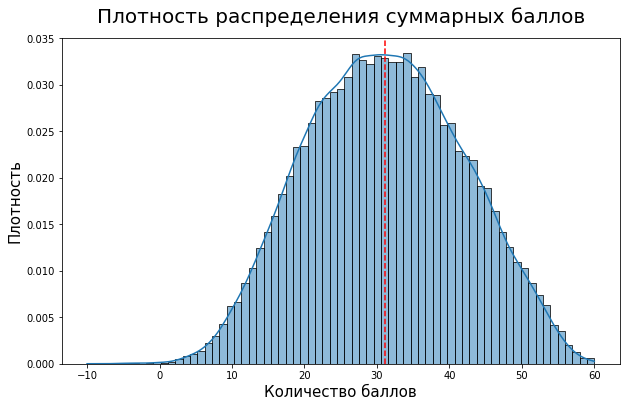

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='total', bins=69, stat='density', kde=True, ax=ax)

ax.set_title('Плотность распределения суммарных баллов', fontsize=20, pad=15)
ax.set_xlabel('Количество баллов', fontsize=15)
ax.set_ylabel('Плотность', fontsize=15)
ax.axvline(x=df['total'].mean(), linestyle='--', color='red');

Ничего удивительного не обнаружили. Очень похоже на нормальное распределение. Красная линия по вертикали обозначает среднее количество очков.

___

Ответим на вопрос есть стали ли со временем люди набирать в игре больше очков или меньше, а может и нет никакой зависимости.

Построим матрицу корреляции, чтобы понять, есть ли какая-либо линейная зависимость между пакетом и раундами. Раунды идут в порядке возрастания, самые новые с самым большим номером. Сооствественно, если корреляция положительная, то со временем люди набирают в раунде больше, если отрицательная, то меньше.

Оценку проведём по шкале Чеддока для качественной оценки показателей тесноты связи:
    
    Количественная мера тесноты связи   Качественная характеристика силы связи
    
               0.1 - 0.3                          слабая
               0.3 - 0.5                          умеренная
               0.5 - 0.7                          заметная
               0.7 - 0.9                          высокая
               0.9 - 0.99                         весьма высокая

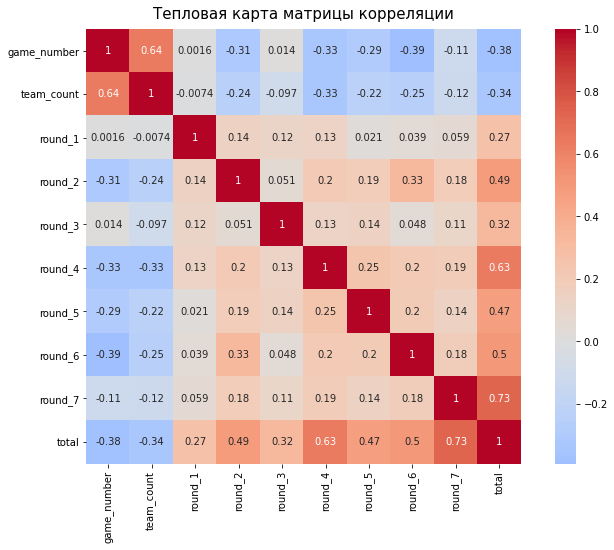

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_grouped.reset_index().corr(),
            cmap='coolwarm',
            annot=True,
            center=0,
            square=True
)
ax.set_title('Тепловая карта матрицы корреляции', fontsize=15, pad=10);

Видим заметную положительную связь между номером игры и количеством команд, это означает, что в квиз со временем стало играть больше команд.

По 2, 4, 5, 6 раундам и по суммарному количеству баллов видим умеренную отрицательную линейную зависимость с номером пакета. Это означает, что со временем люди в среднем стали набирать в данных раундах меньше очков, чем раньше. Слабая отрицательная связь также с раундом 7.

Между пакетом и раундами 1 и 3 тесной зависимости не наблюдается.

___

Построим диаграммы рассеяния, чтобы наглядно посмотреть зависимость.

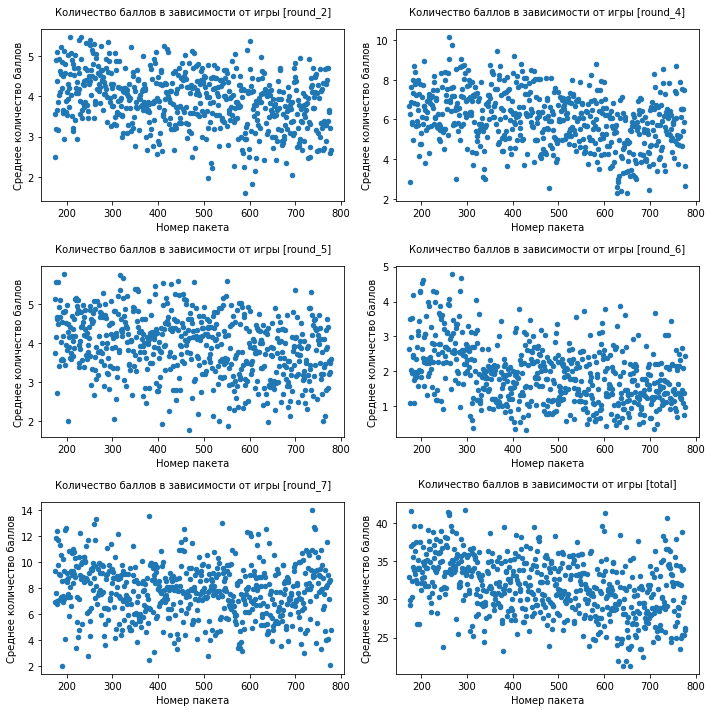

In [35]:
columns = ['round_2', 'round_4', 'round_5', 'round_6', 'round_7', 'total']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2

    df_grouped.reset_index().plot(x='game_number', y=column, ax=ax[row_index, col_index], kind='scatter')

    ax[row_index, col_index].set_title('Количество баллов в зависимости от игры [{}]'.format(column), fontsize=10, pad=15)
    ax[row_index, col_index].set_xlabel('Номер пакета', fontsize=10)
    ax[row_index, col_index].set_ylabel('Среднее количество баллов', fontsize=10)

plt.tight_layout()
plt.show()

Смотря на большинство графиков, визуально просится линия слева направо. То есть от большего количества баллов к меньшему с увеличением номера пакета. Таким образом проиллюстрирована линейная зависимость, которую мы обнаружили в матрице корреляций.

**Со временем команды начали набирать меньшее количество баллов. Связано ли это с увеличивающейся сложность, или с бОльшим количеством новых команд или по каким-то другим причинам сказать сложно, но результаты такие.**

<a href='#Оглавление'>Возврат к оглавлению</a>

<a id='Гипотезы'> </a>

## 4. Гипотезы

Ранее мы рассматривали все игры вместе в разрезе одного пакета. Сейчас же посмотрим, есть разница между играющими в рамках одних пакетов. Игры для новичков проходят на тех же вопросах, но для менее опытных команд. Есть ли разница в результатах?

Сформулируем гипотезы для сравнения игр `[новички] SPB` и `Квиз, плиз! SPB`, они одинаковые для всех раундов и суммарного количества баллов:

- H0: нет различий между средними количества баллов
- H1: есть различия между средними количества баллов

In [36]:
# напишем функцию, так как расчётов много

def GetStats(features):
    
    # признаки - раунды и сумма по всем раундам
    for feature in features:
        new = df[df['game_name'] == '[новички] SPB'][feature]
        old = df[df['game_name'] == 'Квиз, плиз! SPB'][feature]
        
        print('Средний балл в игре "[новички] SPB" по {}: {}'.format(feature, round(new.mean(), 2)))
        print('Средний балл в игре "Квиз, плиз! SPB" по {}: {}'.format(feature, round(old.mean(), 2)))
        
        # уровень статистической значимости
        # если p-value окажется меньше него, отвергнем нулевую гипотезу
        alpha = 0.05 

        results = st.ttest_ind(old, new)

        print('p-значение:', results.pvalue)

        if results.pvalue < alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print('Не получилось отвергнуть нулевую гипотезу')
            
        print('')

In [37]:
features = ['round_1', 'round_2', 'round_3', 'round_4', 'round_5', 'round_6', 'round_7', 'total']

GetStats(features)

Средний балл в игре "[новички] SPB" по round_1: 4.18
Средний балл в игре "Квиз, плиз! SPB" по round_1: 4.41
p-значение: 5.691821392696917e-31
Отвергаем нулевую гипотезу

Средний балл в игре "[новички] SPB" по round_2: 3.2
Средний балл в игре "Квиз, плиз! SPB" по round_2: 3.89
p-значение: 1.3766672173301137e-147
Отвергаем нулевую гипотезу

Средний балл в игре "[новички] SPB" по round_3: 3.27
Средний балл в игре "Квиз, плиз! SPB" по round_3: 3.75
p-значение: 1.9844205856915678e-94
Отвергаем нулевую гипотезу

Средний балл в игре "[новички] SPB" по round_4: 4.42
Средний балл в игре "Квиз, плиз! SPB" по round_4: 5.95
p-значение: 1.1104733155223583e-204
Отвергаем нулевую гипотезу

Средний балл в игре "[новички] SPB" по round_5: 3.04
Средний балл в игре "Квиз, плиз! SPB" по round_5: 3.92
p-значение: 3.012609877420359e-212
Отвергаем нулевую гипотезу

Средний балл в игре "[новички] SPB" по round_6: 1.19
Средний балл в игре "Квиз, плиз! SPB" по round_6: 1.9
p-значение: 2.5076662862328227e-117
От

**Значение по всем раундам ниже p-value, есть основания отвергнуть нулевые гипотезы в пользу альтернативных и считать, что есть статистически значимые разницы в среднем количестве баллов, что означает, что на играх новичков набирается в среднем меньшее количество баллов.**

___

В конце приведём сводную таблицу с относительной разницей баллов.

In [38]:
round_pivot = (
    df.pivot_table(
        columns='game_name',
        aggfunc={
            'round_1': 'mean',
            'round_2': 'mean',
            'round_3': 'mean',
            'round_4': 'mean',
            'round_5': 'mean',
            'round_6': 'mean',
            'round_7': 'mean',
            'total': 'mean'
        }
    )
)


round_pivot['rel_dif_%'] = (round_pivot['Квиз, плиз! SPB'] / round_pivot['[новички] SPB'] - 1) * 100
round_pivot = round_pivot.round(2)

round_pivot

game_name,[новички] SPB,"Квиз, плиз! SPB",rel_dif_%
round_1,4.18,4.41,5.41
round_2,3.20,3.89,21.25
round_3,3.27,3.75,14.85
round_4,4.42,5.95,34.64
round_5,3.04,3.92,29.16
round_6,1.19,1.90,59.96
round_7,5.83,7.86,34.76
total,25.13,31.68,26.05


**По всем показателям более опытные команды опережают менее опытных.**

<a href='#Оглавление'>Возврат к оглавлению</a>

<a id='Вывод'> </a>

## 5. Вывод

Мы рассмотрели некоторые детали игры "Квиз, плиз!". Выяснили, что некоторые пакеты бывают действительно сильно сложнее остальных, а некоторые наоборот. Сложность отдельного раунда в пакетах также сильно варьируется. Заметили интересную закономерность, что со временем команды стали в набирать в сумме меньше баллов. А также убедились, что опыт в игре тоже важен, новички (пока) набирают в среднем меньше баллов во всех раундах.

<a href='#Оглавление'>Возврат к оглавлению</a>